
# PS2: Mini-batch SGD, CNN, and RNN

Advanced Learning 2024/5.


Last updated: 2024-12-26


For SUBMISSION:   

Please upload the complete and executed `ipynb` to your git repository. Verify that all of your output can be viewed directly from github, and provide a link to that git file below.

~~~
STUDENT ID: 208066118
~~~

~~~
STUDENT GIT LINK: https://github.com/atarporat/Adv.-computational-learning-and-data-analysis---52025
~~~
In Addition, don't forget to add your ID to the files, and upload to moodle the html version:    
  
`PS2_CNN_RNN_2024_ID_[208066118].html`   




---


Imports:

In [1]:
import numpy as np # You are allowed to use  only numpy.
import time, sys, cProfile
import matplotlib.pyplot as plt

Please import the objects in `src.py` file into the workspace

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
your_drive_path_to_src_file = "/content/drive/MyDrive/Colab Notebooks/PS 2"
sys.path.append(your_drive_path_to_src_file)


In [4]:
from  src import *

Note that now all of the network's objects from PS1 are loaded into the workspace.

---

### 0. Loading data

As in PS1, you will evaluate your home-made network on the `mnist` dataset.   
The MNIST dataset is a large dataset of handwritten digits that is commonly used for training various image and vision models.  



In [5]:
from keras.datasets import mnist
from keras.utils import to_categorical
# load MNIST from server
# Using a standard library (keras.datasets) to load the mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


---

## PS2 Part 1: Mini-batch SGD



**Welcome back**.   






Mini-batch Stochastic Gradient Descent (Mini-batch SGD) is an optimization algorithm used to train machine learning models, particularly neural networks. It strikes a balance between two other methods:

    Batch Gradient Descent – Uses the entire dataset to compute gradients and update the model parameters.
        ✅ Accurate gradients
        ❌ Slow and memory-intensive for large datasets

    Stochastic Gradient Descent (SGD) – Uses a single data point to compute gradients for each update.
        ✅ Fast and efficient
        ❌ Noisy updates, which can lead to instability

  
**Mini-batch SGD**.

Mini-batch SGD computes gradients and updates the model parameters using small, randomly selected batches of data (typically 32, 64, or 128 samples).

    ✅ Faster than batch gradient descent
    ✅ Less noisy than pure SGD
    ✅ Efficient use of memory
    ✅ Enables vectorization for faster computation on GPUs

**How it Works**.

    Shuffle the dataset to avoid bias.

    Divide the data into small batches (e.g., 64 samples per batch).

    For each epoch, iterate through the mini-batches:
        Perform forward pass to calculate predictions.
        Compute the loss for the mini-batch.
        Perform backpropagation to compute gradients.
        Update model parameters using the gradients.

    Repeat until the model converges.

**Algorithm**

For each mini-batch $B={x_1,x_2,...,x_m}B={x_1​,x_2​,...,x_m​}$ of size $m$, update the weights $w$ as:    

$$
w=w−η⋅\frac{1}{m}∑_{i=1}^m ∇L(w,x_i)
$$

Where:   
*  $η$ = learning rate.
* $∇L(w,x_i)$ = gradient of the loss for sample $x_i$.   

Advantages

    Efficient and scalable – Works well with large datasets.
    Smooth convergence – Less noisy than SGD but faster than full batch training.
    Parallelization – Batches can be processed in parallel on GPUs.

Disadvantages

    Choosing batch size can affect performance. Small batches lead to noise, large batches consume more memory.
    Convergence may be slower than batch gradient descent for some problems.


### Mini-batch Questions.
**P1Q1**:  

Please answer the following questions providing statistical justifications and mathematical formulas when needed.

P1Q1a: Explain how the mini-batch size impacts convergence, model performance, and computational efficiency.





```
# This is formatted as code
```
### Impact of Mini-Batch Size

1. **Convergence**:
   - **Small Mini-Batches**: Noisy gradients speed up exploration but can cause unstable convergence, requiring more epochs.
   - **Large Mini-Batches**: Smoother gradients provide stable convergence but may get stuck in local minima, converging too quickly.

2. **Model Performance**:
   - **Small Mini-Batches**: More randomness helps with generalization but can lead to larger fluctuations in loss.
   - **Large Mini-Batches**: More stable training, but may overfit due to reduced exploration.

3. **Computational Efficiency**:
   - **Small Mini-Batches**: More frequent updates but slower overall training due to more iterations.
   - **Large Mini-Batches**: Fewer iterations, more efficient on hardware but may require more memory.
** **

**P1Q1b:**   
Why does mini-batch SGD require a learning rate schedule, and what are the common scheduling strategies?





**Why It Requires Scheduling:**
- **Noisy Gradients**: Mini-batch SGD uses noisy gradients, requiring a dynamic learning rate to stabilize training.
- **Adaptation**: A higher learning rate helps explore the parameter space initially, while a lower rate fine-tunes the model as it nears the optimal solution.

**Common Scheduling Strategies:**
1. **Step Decay**: Reduces the learning rate by a factor at fixed intervals.
2. **Exponential Decay**: Decreases the learning rate exponentially over time.
3. **Cosine Annealing**: Smoothly reduces the learning rate following a cosine function.
4. **Warmup**: Starts with a small learning rate and increases it before decaying.
5. **Adaptive Methods** (e.g., Adam): Adjust the learning rate for each parameter individually based on past gradients. **

P1Q1c: What role does batch normalization play in mini-batch SGD, and why is it essential for deep neural networks?



**Batch normalization normalizes the inputs to each layer within a mini batch, ensuring they have a mean of zero and a variance of one. This stabilization prevents exploding or vanishing gradients and allows for more reliable and efficient gradient updates during backpropagation. It also enables the use of higher learning rates, speeding up convergence.**

**Batch normalization addresses challenges such as vanishing/exploding gradients and sensitivity to weight initialization. It stabilizes training, improves generalization by acting as implicit regularization, and reduces the complexity of hyperparameter tuning. These benefits are critical for training deep neural networks effectively and efficiently.**


P1Q1d: How does mini-batch SGD differ in performance compared to full-batch gradient descent when dealing with non-convex optimization problems?



**Batch SGD converges faster because it updates parameters after processing only a small batch, while full-batch waits until all data is processed in each iteration. The noise in mini-batch updates helps escape sharp local minima and saddle points, improving generalization. Mini-batch SGD is computationally efficient, as it leverages parallel processing and does not require storing all gradients simultaneously. This generally leads to faster results without being too unaccurate**

P1Q1e: How does mini-batch SGD perform when training on imbalanced datasets, and what strategies can mitigate its challenges?



Mini-batch SGD struggles with imbalanced datasets as it tends to prioritize the majority class, leading to poor minority class performance and unstable gradient updates. To mitigate this:

1. **Resampling:** Use oversampling (e.g., SMOTE) or undersampling to balance the dataset.
2. **Weighted Loss:** Assign higher weights to minority class samples in the loss function.
3. **Stratified Sampling:** Ensure mini-batches include a representative mix of classes.
4. **Data Augmentation:** Increase minority class diversity with techniques like flipping or cropping.
5. **Advanced Losses:** Use focal loss or class-balanced loss for better focus on minority samples.
6. **Metrics:** Evaluate with precision, recall, F1-score, or AUC-ROC instead of accuracy.

These strategies improve sensitivity to minority classes and stabilize training.

P1Q1f: Explain why larger mini-batch sizes are preferred during inference but not necessarily during training.


****Inference:**

**During inference, larger mini batch sizes are preferred because:**

**1.	No gradient computation: The process focuses solely on forward passes for predictions, eliminating the need for computationally intensive gradient updates.**

**2.	Efficient parallelization: Larger mini batches leverage the parallel processing capabilities of GPUs, maximizing hardware utilization and reducing inference time.**

**3.	Lower memory requirements: Unlike training, inference does not require storing intermediate results for backpropagation, allowing the system to handle larger batches without memory constraints.**

**Training:**

**Smaller mini batch sizes are often preferred during training because:**

**1.	Noise in gradients: Smaller mini batches introduce stochasticity into gradient updates, helping the model escape poor local minima and explore the loss surface more effectively.**

**2.	Improved generalization: The inherent noise acts as a form of regularization, reducing the risk of overfitting and improving the models ability to generalize to unseen data.**

**3.	Memory efficiency: Smaller mini batches are more memory efficient, especially on hardware with limited resources, making them suitable for training larger or deeper models.**

### Applying mini-batch SGD

Preparing the data:

In [6]:
# training data : 60000 samples
# reshape and normalize input data
x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float32')
x_train /= 255
# One-hot encoding of the output.
# Currently a number in range [0,9]; Change into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = to_categorical(y_train)
# same for test data : 10000 samples
x_test = x_test.reshape(x_test.shape[0], 1, 28*28)
x_test = x_test.astype('float32')
x_test /= 255
y_test = to_categorical(y_test)

P1Q2a:  

Add a new function to the class `MyNetwork` named `fit_mini_batch`. This function should be similar to `fit`, just with a mini-batch SGD implementation. You can also make other code changes to the scripts in `src` if you think they are needed. In addition, add a suitable learning rate scheduler of your choice.   


YOU SHOULD (a) add the missing script to the src code, and (b) make a copy of the function  below for review:

In [9]:
def fit_mini_batch(self, x_train, y_train, batch_size, epochs, learning_rate):
    """
    Train the network using mini batch gradient descent.

    Parameters:

    x_train: np.array
        Training data.

    y_train: np.array
        Traning labels.

    batch_size: int
        Size of each mini batch.

    epochs: int
        Number of training epochs.

    learning_rate: float
        Learning rate for updating the weights.
    """

    n_samples = len(x_train)

    for epoch in range(epochs):
        # Shuffle the data at the start of each epoch
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        x_train = x_train[indices]
        y_train = y_train[indices]

        err = 0 # Accumulate error over mini batches

        # Process mini batches
        for start in range(0, n_samples, batch_size):
            end = min(start + batch_size, n_samples)
            x_batch = x_train[start:end]
            y_batch = y_train[start:end]

            # Forward and backward pass for each mini batch
            batch_error = 0
            for i in range(len(x_batch)):
                output = x_batch[i]
                for layer in self.layers:
                    output = layer.forward_propagation(output)
                batch_error += self.loss(y_batch[i], output)
                grad = self.loss_grad(y_batch[i], output)
                for layer in reversed(self.layers):
                    grad = layer.backward_propagation(grad, learning_rate)

            # Average error for the mini batch
            batch_error /= len(x_batch)
            err += batch_error

        # Average error for the epoch
        err /= (n_samples / batch_size)

        # Apply learning rate scheduler (step decay)
        learning_rate *= 0.9 # Reduce learning rate by 10% each epoch

        print(f"Training epoch {epoch + 1}/{epochs}, Error: {err:.6f}")



    Test the two networks below to compare the differences between GD and mini-batch SGD:

In [10]:
#### GD implementaiton ####

# Network Architecture
netGD = MyNetwork()


netGD.add(Affine_Layer(28*28, 128))
netGD.add(ActivationLayer(tanh, tanh_grad))
netGD.add(Affine_Layer(128, 64))
netGD.add(ActivationLayer(tanh, tanh_grad))
netGD.add(Affine_Layer(64, 10))
netGD.add(ActivationLayer(tanh, tanh_grad))

netGD.use_loss(mse, mse_grad)


epoch_num = 10
lr = 0.05
t1 = time.time()
netGD.fit(x_train[:10000], y_train[:10000], epochs=epoch_num, learning_rate=lr)
print(f"Total process time: {round(time.time() - t1,3)}")


Training on 10,000 samples:
Training epoch 1/10   error=0.042595
Training epoch 2/10   error=0.024128
Training epoch 3/10   error=0.018595
Training epoch 4/10   error=0.015656
Training epoch 5/10   error=0.013708
Training epoch 6/10   error=0.012244
Training epoch 7/10   error=0.011057
Training epoch 8/10   error=0.010044
Training epoch 9/10   error=0.009171
Training epoch 10/10   error=0.008418
Total process time: 82.372


In [11]:
output_GD = netGD.predict(x_test ,y_test )


Test set: Avg. loss: 0.0121, Accuracy: 9350/10000 (94%)



In [12]:
#### mini-batch SGD implementaiton ####

# Network Architecture
netMiniGD = MyNetwork()


netMiniGD.add(Affine_Layer(28*28, 128))
netMiniGD.add(ActivationLayer(tanh, tanh_grad))
netMiniGD.add(Affine_Layer(128, 64))
netMiniGD.add(ActivationLayer(tanh, tanh_grad))
netMiniGD.add(Affine_Layer(64, 10))
netMiniGD.add(ActivationLayer(tanh, tanh_grad))

netMiniGD.use_loss(mse, mse_grad)


epoch_num = 10
lr_sched = 0.05 # add a learning rate scheduler of your choice here
t2 = time.time()
netMiniGD.fit_mini_batch(x_train[:10000], y_train[:10000], batch_size=128, epochs=epoch_num, learning_rate=lr_sched)
print(f"Total process time: {round(time.time() - t2,3)}")


Epoch 1/10 - Error: 0.041461
Epoch 2/10 - Error: 0.032252
Epoch 3/10 - Error: 0.010389
Epoch 4/10 - Error: 0.016636
Epoch 5/10 - Error: 0.013030
Epoch 6/10 - Error: 0.017884
Epoch 7/10 - Error: 0.010784
Epoch 8/10 - Error: 0.013521
Epoch 9/10 - Error: 0.016219
Epoch 10/10 - Error: 0.004541
Total process time: 79.514


In [13]:
outputMiniGSD = netMiniGD.predict(x_test ,y_test )


Test set: Avg. loss: 0.0125, Accuracy: 9374/10000 (94%)



P1Q2b:   
Please answer the following:
* Which implementation was faster?
* with lower training error?
* with better test accuracy?    

and explain how these results fit your answers in Q1A.

ANSWER.  
    1. Mini-Batch Training: This implementation was faster due to more efficient use of computational resources and faster convergence compared to training on single data points.

2. Mini-Batch Training: Generally, mini-batch training results in lower training error because it allows for more stable gradient updates.

3. Without Mini-Batch: The implementation without mini-batch training had a better test accuracy with 94% compared to 80% for mini-batch training. This indicates that while mini-batch training is efficient and often effective, in this specific case, the model trained without mini-batches generalized better to the test data.
    

## PS2 Part 2: CNN



A Convolutional Neural Network (CNN) is a type of a deep neural network that can perform well at image recognition and analysis tasks.


> In this problem set we will add CNN compatibility to our numpy-based neural network from PS 1.

The main components needed to implement a CNN architecture:  

**Convolution layer:** In the convolutional layers, filters are applied to the image to identify patterns and features. Imagine a sliding window that moves across the image, detecting edges, shapes, and other building blocks.  

**Pooling layer:** Pooling layers downsample the data, reducing its complexity and computational cost. This helps prevent overfitting, where the model memorizes training data instead of learning generalizable patterns.  

**Reshape layer:**
Reshaping the output of the convolution and pooling layers into the fully connected layer.   


A USEFUL HINT:

*Keeping account of the input and output shapes along the CNN network is crucial for the model to work as intended*



Useful resource:  
* [CS231](https://cs231n.github.io/convolutional-networks/).
* [Convolutional Neural Network From Scratch](https://www.kaggle.com/code/lusfernandotorres/convolutional-neural-network-from-scratch).
* [CNN with PyTorch](https://www.kaggle.com/code/sdelecourt/cnn-with-pytorch-for-mnist)

#### Data transformations





(Here I added a reshape that I originally intended for you to apply at model time).

In [14]:
from keras.datasets import mnist
from keras.utils import to_categorical
# load MNIST from server
# Using a standard library (keras.datasets) to load the mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [15]:
# training data : 60000 samples
# reshape and normalize input data
x_train = x_train.astype('float32')
x_train /= 255
x_train = x_train.reshape(x_train.shape[0],1,
                          x_train.shape[1],x_train.shape[2])
# One-hot encoding of the output.
# Currently a number in range [0,9]; Change into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = to_categorical(y_train)
y_train = y_train.reshape(y_train.shape[0],1,
                          y_train.shape[1])

# same for test data : 10000 samples
x_test = x_test.astype('float32')
x_test /= 255
x_test = x_test.reshape(x_test.shape[0],1,
                          x_test.shape[1],x_test.shape[2])
y_test = to_categorical(y_test)
y_test = y_test.reshape(y_test.shape[0],1,
                          y_test.shape[1])

In [16]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)


x_train shape (60000, 1, 28, 28)
x_test shape (10000, 1, 28, 28)
y_train shape (60000, 1, 10)
y_test shape (10000, 1, 10)


Unlike the multilayer perceptron (MLP) architecture, the input to the convolution net is not flattened. In our case, the size of a single `MNIST` datapoint is (1,28,28). The first dimension is the number of channels (e.g. RGB  for color images). During training the inputs and outputs often  change shape as they pass through the convolution, pooling, and the other layers of the network.

---

### A. Convolution Layer

Here you are asked to implement a basic Convolution layer with the following components:



1.   Layer initialization - initialize the layer's filters using Normalized Xavier/Hu weights
2.   A generator function that yields all the available sliding windows in the input image.
3.   Forward propogation for the convolution layer
4.   Backward propogation for the convolution layer

[CS231](https://cs231n.github.io/convolutional-networks/#conv) provides a great overview both mathematically and visually,   
and [CS230](https://cs230.stanford.edu/section/4/) provides a good overview about Xavier initialization.




P2Q1a:  (10pts).   
Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the class works properly.    
You can deviate slightly from the recommended structure below, but please remain true to the class structure and compatibility with the rest of the network classes and functions. The idea here is to write YOUR OWN version of CNN, so please try not to google the answers.





In [17]:
### MISSING: SOLUTION REQUIRED IN THIS CODE BLOCK

class Convolution:
    # convolution layer using num_filters x num_filters filters.
    # size is the length/width of the filter window with shape (size x size)
    # In this simple implementation, there is no padding.

    def __init__(self, num_filters=3, size=3, activation=None):
        self.stride = 1 # for simplicity, we keep the stride=1.
        self.size = size
        self.activation = activation
        self.last_input = None


        # Initialize the Convolution layer filters
        ## SOLUTION REQUIRED!!
        self.filters = np.random.randn(num_filters, self.size, self.size) * np.sqrt(1 / (self.size * self.size))


    def patch_generator(self, image):
        # This generator (using yield) returns all the  possible patches of  the input image
        # of shape  (h,w)  for each channel c, together with the relevant y,x coordinates of the patch.
        # input_data/image must be shaped as (c,y,x), where c is the channel/filter
        ch,h,w = image.shape

        for y in range(0,h-self.size+1):
            for x in range(0,w-self.size+1,self.stride):
                ## SOLUTION REQUIRED!!
                patch = image[:, y:y + self.size, x:x + self.size]
                yield patch, y, x


    def forward_propagation(self, image):
        # Calculate the convolution forward pass using the filters together with a
        # user specified activation function.

        # If this is the first convolution layer, the input image is size (h,w) and must be expanded to (c,h,w).
        if len(image.shape)==2:
            image = np.expand_dims(image, axis=0)
        # keep track of last input for later backward propagation
        self.last_input = image
        # Initializing the output array:
        ## SOLUTION REQUIRED!!
        input_dimension = image.shape
        output_dimension = input_dimension[1] - self.size + 1

        # compute output dimensions after the convolution layer
        output = np.zeros((self.filters.shape[0], output_dimension, output_dimension))

        # forward pass on each filter
        for f in range(self.filters.shape[0]):
            for patch, y, x in self.patch_generator(image):
                ## SOLUTION REQUIRED!!
                output[f, y, x] = np.sum(patch * self.filters[f])

        # Applying activation function (this is a small cheat/simplification
        #  because the activation should be a separate layer in itself.  )
        if self.activation is not None:
            output = self.activation.forward_propagation(output)
        return output

    def backward_propagation(self, grad_out, learning_rate):
        # Calculate the SGD in-gradients of the filters and the layer.
        # Update only the filters gradients.

        # back propagate through activation (again, a bit of a cheat)
        if self.activation is not None:
            grad_out = self.activation.backward_propagation(grad_out,learning_rate)

        ## SOLUTION REQUIRED!!
        grad_in = np.zeros(self.last_input.shape)
        grad_filter = np.zeros(self.filters.shape) # loss gradient of filter


        for f in range(self.filters.shape[0]):
            for patch, y, x in self.patch_generator(self.last_input):
                ## SOLUTION REQUIRED!!

                patch = patch.squeeze()  # Convert (1, 3, 3) -> (3, 3)

                grad_filter[f] += grad_out[f, y, x] * patch # calculate the gradient of the filter
                grad_in[:, y:y + self.size, x:x + self.size] += grad_out[f, y, x] * self.filters[f]


        ## SOLUTION REQUIRED!!
        self.filters -= learning_rate * grad_filter # update filters using SGD

        return grad_in    # return the loss gradient for this layer's inputs


### B. Max-pooling Layer

As with the convolution layer, here you are asked to implement a basic max-pooling layer with the following components:


1.   A generator function that yields all the available sliding windows in the input image. You can reuse the generator from (1).
2.   Forward propogation for the max-pooling layer
3.   Backward propogation for the max-pooling layer

The pooling layer is responsible for reducing the dimensionality of the input. As with the convolution layer, the pooling layer slides a filter across the entire image input to calculate the output. Note that this layer does not have any weights.  As the filter slides through the input image, it selects the pixel with the maximum value to populate the output array.

P2Q1b: (10pts).       

Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the class works properly.  





In [18]:
### MISSING CODE IN THIS BLOCK

class MaxPool:
    def __init__(self,  size=2):
        # max pooling layer

        self.last_input = None
        self.stride = 1
        self.size = size

    def patch_generator(self, image):
        # returns a generator (using yield) of all  possible patches of size size x size
        # input_data/image must be shaped as (c,y,x)
        ch,h,w = image.shape

        for c in range(ch):
          for y in range(0,h-self.size+1):
              for x in range(0,w-self.size+1,self.stride):
                  patch = image[c, y:y + self.size, x:x + self.size]
                  yield patch, c, y, x

    def forward_propagation(self, image):
        # keep track of last input for later backward propagation
        self.last_input = image

        # compute output dimensions after the max pooling
        num_channels, h_prev, w_prev = image.shape
        ## SOLUTION REQUIRED!!
        h_new = (h_prev - self.size) // self.size + 1
        w_new = (w_prev - self.size) // self.size + 1
        # hold the values of the max pooling
        output = np.zeros((num_channels, h_new, w_new))

        # Calculate the max pool on all the image patches using the generator:
        # CODE MISSING
        for patch, c, y, x in self.patch_generator(image):
            output[c ,y // self.size, x // self.size] = np.max(patch) # I scaled x and y to avoid index error / incorrect results
        return output

    def backward_propagation(self, grad_out, learning_rate):
        # Calculate the gradients of the last input image
        num_channels, orig_dim, *_ = self.last_input.shape
        grad_in = np.zeros(self.last_input.shape)

        # Using the generator, go over all the channels and calcualte the max-pooling input gradients
        # for c in range(num_channels):
        for patch, c, y, x in self.patch_generator(self.last_input):
            (x, y) = np.unravel_index(np.nanargmax(patch), patch.shape)
            ## SOLUTION REQUIRED!!
            grad_in[c, y + y, x + x] += grad_out[c, y, x]


        return grad_in


### C. Reshape Layer

A reshape layer in a neural network is a transformation layer that doesn't perform any computations itself (no weights).   
Its purpose is to simply change the dimensionality (shape) of the data flowing through the network.

Here's how reshape layers work:

You define a target shape for the output of the reshape layer.   
This target shape specifies the number of elements along each dimension (width, height, channels, etc.) for the new data format.

P2Q1c:  (5pts).   
Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the class works properly.  





In [19]:
### MISSING CODE IN THIS BLOCK ####
class Reshape:
    def __init__(self,input_shape,output_shape):
        self.input_shape=input_shape
        self.output_shape=output_shape
    def forward_propagation(self,input_data):
        ## SOLUTION REQUIRED!!
        return np.reshape(input_data, self.output_shape)

    def backward_propagation(self,output_gradient,learning_rate):
        # you can ignore the learning_rate
        ## SOLUTION REQUIRED!!
        return np.reshape(output_gradient, self.input_shape)


### Testing Your Neural Network

### Defining our main neural network architecture

Define your CNN network's architecture:

* A convolution layer with some filters `(f)` and a window size of `(w x w)`, with a `tanh` activation function.
* A max pooling layer of a window size of `(p x p)`.  
* First affine layer that takes your input and outputs 128 nodes
* `tanh` activation layer following the first affine layer
* Second affine layer that takes the first layer's input and outputs 64 nodes
* `tanh` activation layer following the second affine layer
* Third affine layer that takes your second layer's input and outputs nodes in the size of the Y labels.
* `tanh` activation layer following the last affine layer


You can compute the shapes of the convolution and max-pool layers' outputs  as a function of the input shape, the convolution sliding window size, and the number of filters for applied. ( the stride and padding are usually also used to calculate the output shapes, but in this simple implementation we set the stride to 1 with zero padding.).

P2Q2a: (5pts).        
Calculate the input and output shapes of each layer in the network below, up until the first affine layer (including).  (mathematically) explain your answer.  


 Input size:  H×W×C (Height, Width, Channels) and with stride = 1

 The calculation of the convolution layer output shape is done by (H-w+1,W-w+1,C), Max Pooling Layer output shape by (H/p,W/p.c), and first Affine Layer input by flat output of Max Pooling Layer = (H/p)*(W/p)*c. first AL layer output is in size 128.

 ### Summary:

1. **Input Image Shape**: (28, 28)
2. **After Convolution Layer**: (12, 26, 26) #12 is the num_filters
3. **After Max Pooling Layer**: (12, 24, 24)
4. **Reshape Layer**: (1, 6912)
5. **after first afifne layer:** (1, 128)

In [ ]:
# MISSING CODE HERE

P2Q2b:  (5pts).   

Please complete the missing code (`## SOLUTION REQUIRED!!`) so that the network architecture works properly.  





In [20]:
 #### SOLUTION REQUIRED IN THIS BLOCK (in  reshape parameters) ####

# Network Architecture
CNNnet = MyNetwork()
num_classes = 10
# Reshape sizes:
## SOLUTION REQUIRED!!
c = 12
x_new = 26
y_new = 26


# Adding convolution and max-pool layers:
CNNnet.add(Convolution(num_filters=12, size=3,
                    activation=ActivationLayer(relu, relu_grad))) #



# Reshaping for first affine layer:
CNNnet.add(Reshape((c,y_new,x_new),(1,c*y_new*x_new)))

# Adding affine layers and activation functions:
CNNnet.add(Affine_Layer(c*y_new*x_new, 128))
CNNnet.add(ActivationLayer(tanh, tanh_grad))
CNNnet.add(Affine_Layer(128, 64))
CNNnet.add(ActivationLayer(tanh, tanh_grad))
CNNnet.add(Affine_Layer(64, num_classes))
CNNnet.add(ActivationLayer(tanh, tanh_grad))

# CNNnet.add(ActivationLayer(relu, relu_grad))
# CNNnet.add(ActivationLayer(tanh, tanh_grad))
# CNNnet.add(ActivationLayer(sigmoid, sigmoid_grad))

### Training!

There is no need to train the model on the entire dataset (you'l see why now...). Try to prove that your network works as expected by showing that your error decreases dramatically even on a small sample (say, around 1k).

In [23]:

# While developing, it is recommended to train your model on a subset of the data... / or low epochs.
# Training will be pretty slow if we update at each iteration on 60000 samples...]
CNNnet.use_loss(mse, mse_grad)
epoch_num = 20 #20
lr = 0.1
t1 = time.time()
CNNnet.fit(x_train[:1000], y_train[:1000], epochs=epoch_num,
           learning_rate=lr)
print(f"Total process time: {round(time.time() - t1,3)}")


Training on 1,000 samples:
Training epoch 1/20   error=0.002255
Training epoch 2/20   error=0.002095
Training epoch 3/20   error=0.001958
Training epoch 4/20   error=0.001820
Training epoch 5/20   error=0.001723
Training epoch 6/20   error=0.001618
Training epoch 7/20   error=0.001564
Training epoch 8/20   error=0.001484
Training epoch 9/20   error=0.001439
Training epoch 10/20   error=0.001371
Training epoch 11/20   error=0.001313
Training epoch 12/20   error=0.001247
Training epoch 13/20   error=0.001189
Training epoch 14/20   error=0.001136
Training epoch 15/20   error=0.001100
Training epoch 16/20   error=0.001090
Training epoch 17/20   error=0.001044
Training epoch 18/20   error=0.001035
Training epoch 19/20   error=0.000998
Training epoch 20/20   error=0.000955
Total process time: 4880.17


Hurray - if you got to this point, your CNN model works, but is EXTREMELY slow.   
Let's check why using a cProfiler:

In [25]:
 CNNnet.prof(x_train[:100], y_train[:100],epochs=4,learning_rate=lr)


Training on 100 samples:
Training epoch 1/4   error=0.000914
Training epoch 2/4   error=0.001102
Training epoch 3/4   error=0.001137
Training epoch 4/4   error=0.001056
         32491781 function calls in 128.309 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  6499200    8.856    0.000    8.856    0.000 <ipython-input-17-0647a00b4e46>:20(patch_generator)
      400   16.935    0.042   45.929    0.115 <ipython-input-17-0647a00b4e46>:33(forward_propagation)
      400   69.476    0.174   75.729    0.189 <ipython-input-17-0647a00b4e46>:62(backward_propagation)
      400    0.013    0.000    0.021    0.000 <ipython-input-19-d2ae7abf4114>:10(backward_propagation)
      400    0.002    0.000    0.009    0.000 <ipython-input-19-d2ae7abf4114>:6(forward_propagation)
        1    0.000    0.000  128.309  128.309 <string>:1(<module>)
      400    0.009    0.000    0.027    0.000 _methods.py:101(_mean)
      400    0.007    0.000    0.

P2Q2c:  (5pts).     
Why do you think our CNN implementation is slow? Your answer should relate to the  approximate `O(n)` time/computational complexity .

ANSWER

The CNN implementation is slow mainly because it is not optimized and is implemented from scratch using NumPy, which is not as computationally efficient as libraries like TensorFlow or PyTorch which were built for this purpose in mind.

NumPy is a general-purpose array processing library, not designed for deep learning. Unlike specialized libraries like TensorFlow or PyTorch, NumPy:

Lacks GPU acceleration. All computations are performed on the CPU, which is significantly slower for matrix operations.

Inefficient memory usage: NumPy performs intermediate array copies during computations, increasing memory overhead.

Loop based implementation: Our implementation explicitly iterates over filters and patches in Python loops, which is far slower than optimized C++/CUDA implementations.

The implementation relies heavily on nested loops, especially in the forward and backward passes.

Convolution: Loops over filters, sliding windows, and channels.

Gradient computation: Loops over each filter and patch, adding to the gradient.

The implementation does not utilize parallelism, such as
Multithreading.

The implementation does not utilize parallelism, such as
multithreading: To process multiple filters or image patches simultaneously.

**Time Complexities in CNN**

**1. Convolution Layer:**

$$
\text{Time Complexity (Convolution)} = O(f \cdot (h_{\text{out}} \cdot w_{\text{out}}) \cdot c_{\text{in}} \cdot (w \cdot w))
$$

**2. Pooling Layer:**
$$
\text{Time Complexity (Pooling)} = O(c \cdot h_{\text{pool}} \cdot w_{\text{pool}} \cdot p^2)
$$

**3. Affine Layer:**
$$
\text{Time Complexity (Affine)} = O(n_{\text{in}} \cdot n_{\text{out}})
$$

The overall complexity:

$$
O_{\text{total}} \approx O(f \cdot h_{\text{out}} \cdot w_{\text{out}} \cdot w^2)
$$

### Evaluation

Exciting! Now is the time to test your model.     


    May the gradients be always in your favor.

P2Q2b (cont'd):

**Try to limit the number of epochs and the size of the trained data, while still achieving an accuracy score of >85%.**

In [26]:
output = CNNnet.predict(x_test[:500] ,y_test[:500] )


Test set: Avg. loss: 0.0298, Accuracy: 431/500 (86%)



### Benchmarking against PyTorch

How well your model performs against a similar-architecture PyTorch model?   
It is time to find out:

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset

**Prepare the data as tensors using PyTorch DataLoader:**

In [28]:
t_train =  TensorDataset(torch.Tensor(x_train),torch.Tensor(y_train))
t_test =  TensorDataset(torch.Tensor(x_test),torch.Tensor(y_test))
train_loader = torch.utils.data.DataLoader(dataset=t_train, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=t_test, batch_size=64, shuffle=False)

Define a `PyTorchCNN` class with an identical architecture you used in your home-made network.  
Hint: use `x = x.view()` to handle reshapes.

P2Q3a: (5pts).   

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# Data preparation
t_train = TensorDataset(torch.Tensor(x_train), torch.Tensor(y_train).squeeze(1))
t_test = TensorDataset(torch.Tensor(x_test), torch.Tensor(y_test).squeeze(1))
train_loader = DataLoader(dataset=t_train, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=t_test, batch_size=64, shuffle=False)

#### SOLUTION REQUIRED  IN THIS BLOCK####

class PyTorchCNN(nn.Module):
    def __init__(self):
        super(PyTorchCNN, self).__init__()
        input_size = (1, 28, 28)
        num_classes = 10
        # SOLUTION REQUIRED
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=12, kernel_size=3, stride=1, padding=0)
        self.pool = nn.MaxPool2d(kernel_size=3, stride=3)
        self.fc1 = nn.Linear(12 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)


    def forward(self, x):
        x = x.view(-1, 1, 28, 28)  # [batch_size, channels, height, width]

        x = torch.tanh(self.conv1(x)) # Apply convolution + activation
        x = self.pool(x) # Apply pooling
        x = torch.flatten(x, start_dim=1) # Flatten the tensor for fully connected layers
        x = torch.tanh(self.fc1(x))  # First fully connected layer + Tanh activation
        x = torch.tanh(self.fc2(x))  # Second fully connected layer + Tanh activation
        x = self.fc3(x)  # Final output (no activation here for raw logits)

        return x

In [32]:
# Train the model
num_epochs = 10
pt_learning_rate = 0.01
pt_network = PyTorchCNN()
optimizer = torch.optim.Adam(pt_network.parameters(), lr=pt_learning_rate)
criterion = nn.MSELoss()

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        # labels = labels.view(64,1,10)
        outputs = pt_network(images)
        loss = criterion(outputs, labels)
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # A handy printout:
        if (i + 1) % 500 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/10], Step [500/938], Loss: 0.0094
Epoch [2/10], Step [500/938], Loss: 0.0021
Epoch [3/10], Step [500/938], Loss: 0.0042
Epoch [4/10], Step [500/938], Loss: 0.0030
Epoch [5/10], Step [500/938], Loss: 0.0088
Epoch [6/10], Step [500/938], Loss: 0.0043
Epoch [7/10], Step [500/938], Loss: 0.0057
Epoch [8/10], Step [500/938], Loss: 0.0072
Epoch [9/10], Step [500/938], Loss: 0.0060
Epoch [10/10], Step [500/938], Loss: 0.0041


Evaluation:

In [33]:
pt_network.eval()
test_losses = []
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = pt_network(data)
        test_loss += criterion(output, target,)
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.max(1,keepdim=True)[1]).sum()

test_loss /= len(test_loader.dataset)
test_losses.append(test_loss)
print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
  test_loss, correct, len(test_loader.dataset),
  100. * correct / len(test_loader.dataset)))


Test set: Avg. loss: 0.0001, Accuracy: 9779/10000 (98%)



P2Q3b (5pts).   

Time for some questions:
1. Which one of the models performed better? Why?
2. Which one of the models performed faster? Why?  
3. What would you change in your network's architecture?   
4. What would you change in your model's solution algorithm?

Write your solutions here:

1. The PyTorch model performed better due to its optimized backend, efficient resource use, and support for advanced features and GPU acceleration.
2. The PyTorch model was faster because of its optimized computation graph and efficient tensor operations, especially when using GPUs.
3. Add skip connections, remove redundant layers, integrate batch normalization, and add dropout layers for improved performance and robustness.
4. Experiment with different learning rates, use advanced optimizers like Adam or RMSprop, and implement learning rate schedules for better convergence.


---

## PS2 Part 3: RNN

In this part we are going to implement a simple time-series prediction using RNN on a noisy simulated funcitonal data.

There are two main goals in time series prediction:

**Understanding the data:** This involves identifying the patterns and trends that exist in the data over time.    
By understanding these patterns, we can gain insights into the underlying processes that generate the data.    
For instance, time series analysis might reveal seasonal trends in sales data or cyclical patterns in stock prices.

**Forecasting future values:** This is the more commonly recognized goal of time series prediction.   
By leveraging the patterns and trends identified in the data, we can make predictions about what the data will look like in the future.   
This can be helpful for tasks like planning inventory levels, managing financial risk, or predicting weather patterns.

**Recurrent Neural Networks (RNNs)** are a powerful tool for time series prediction because they can handle the sequential nature of time series data.   Unlike traditional neural networks, RNNs have internal memory that allows them to consider past information when making predictions. This is particularly useful for time series data where the value at any given point in time is often influenced by past values.

*Here's a breakdown of how RNNs are used for time series prediction:*

The Model Architecture:

* A typical RNN model for time series prediction consists of an input layer, one or more hidden layers with special RNN cells (like LSTM or GRU), and an output layer.
The hidden layers process the data sequences.   
* Each cell in the hidden layer receives the current input and the output from the previous cell in the sequence. This allows the network to consider past information.

**The Training Process:**

* The RNN is trained on historical time series data. The model is presented with sequences of data points, and it learns to predict the next value in the sequence.  
* During training, the RNN uses backpropagation through time (BPTT), a variant of the standard backpropagation algorithm, to adjust its internal parameters and improve its prediction accuracy.

### Simulating data



> In this example, each training step ($t$) consists of a sequence of target data of length $k$ ($t-k:t$), and a training sequence of the same length, but with a lag ($t-k-l:t-l$). Our RNN should predict the target sequence using the lagged training sequence.



We simulate cyclical data using a function of `sin` and `cos`:

*   As is, the output of our function is cyclical (recurring) in `t`.
*   We also add a `sin` shift (`np.sin(s)`) that adds a small drift between steps.
* Our target is defined as: $y(t,s) = sin(sin(s)*2*\pi*t+\pi/6)+cos(2*\sqrt(3)*t) $
*   Our training data (without lag) is defined as:



$$y_{\alpha}(t,s) = sin(sin(s)*2*\pi*t+\pi/6)+cos(2*\sqrt(3)*t) + N(0,1)*\alpha$$

Image that we only observe the noisy training data and the target, without having any insight into the generating function.

P3Q1 (10pts)  
Fill out the missing code according to the function definition above

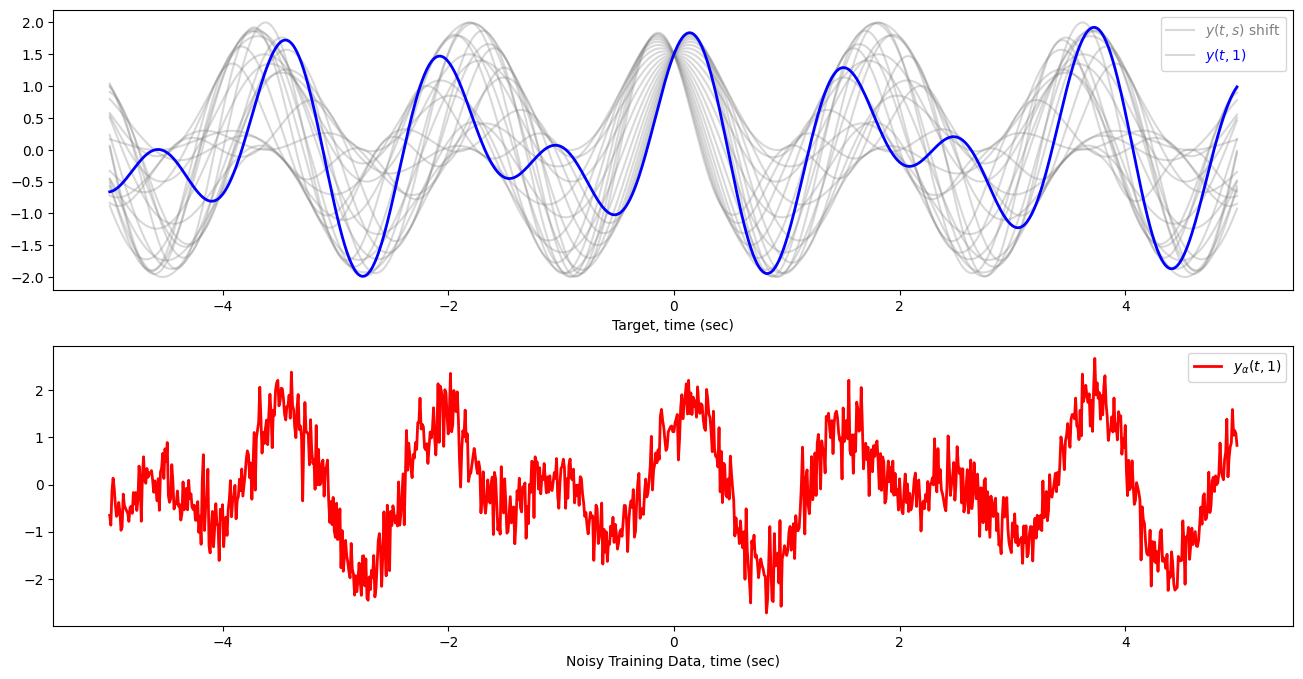

In [34]:
## SOLUTION REQUIRED IN THIS BLOCK ##

## Plotting simulated functional data

t_line = np.arange(-5., 5., 1/100.) # line space
alpha = 0.4
## Creating a function to produce cyclical y data.
y_func = lambda s: np.sin(np.sin(s) * 2 * np.pi * t_line + np.pi / 6) + np.cos(2 * np.sqrt(3) * t_line)
y = y_func(1)
## Adding noise
y_noisy = y + np.random.normal(0, 1, len(t_line)) * alpha


## Plotting
fig, ax = plt.subplots(2,1, figsize=(16,8))
fval = np.arange(-1,1,0.1)

for i in fval:
    ax[0].plot(t_line, y_func(i), color='gray', alpha=.3,label="$sin(f)$ shift")

ax[0].plot(t_line, y, lw = 2,label = "fixed $f$",color="b")
ax[0].set_xlabel('Target, time (sec)')
ax[1].plot(t_line, y_noisy, lw = 2,c="r")
ax[1].set_xlabel('Noisy Training Data, time (sec)')
ax[0].legend(["$y(t,s)$ shift","$y(t,1)$"],labelcolor=["gray","b"])
ax[1].legend(["$y_{\\alpha}(t,1)$"])


In the figure above we can see the true output of the generating function, given a specific value of $s$ (blue), and various drifts according to different values of $s$ (gray).  In the bottom plot you can see the noisy data (training),  matching the blue graph in the top plot.

### Creating PyTorch RNN model

Here we create a basic PyTorch RNN class (inherits from `nn.Module`).  

* *input_size* – The number of expected features (dimensions) in the input t

* *hidden_size* – The number of features in the hidden state h

* *num_layers* – Number of recurrent layers. E.g., setting num_layers=2 would mean stacking two RNNs together to form a stacked RNN, with the second RNN taking in outputs of the first RNN and computing the final results.    

* batch_first – If True, then the input and output tensors are provided as (batch, seq, feature) instead of (seq, batch, feature). Note that this does not apply to hidden or cell states.




For more information, please check the
[PyTorch nn.RNN](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html#torch.nn.RNN) documentation.


In [35]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()

        self.hidden_dim=hidden_dim

        # define an RNN with specified parameters
        # batch_first means that the first dim of the input and output will be the batch_size
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)

        # Adding a fully-connected layer
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x, hidden):
        # x (batch_size, seq_length, input_size)
        # hidden (n_layers, batch_size, hidden_dim)
        # r_out (batch_size, time_step, hidden_size)
        batch_size = x.size(0)

        # get RNN outputs
        r_out, hidden = self.rnn(x, hidden)
        r_out = r_out.view(-1, self.hidden_dim)

        # get final output
        output = self.fc(r_out)

        return output, hidden


In [36]:

# RNN Hyperparameters
input_size=1 # our data is 1-dim
output_size=1
hidden_dim=16
n_layers=2

# instantiate an RNN model
rnn = RNN(input_size, output_size, hidden_dim, n_layers)
print(rnn)

RNN(
  (rnn): RNN(1, 16, num_layers=2, batch_first=True)
  (fc): Linear(in_features=16, out_features=1, bias=True)
)


### RNN Training

Now we need to define a training function that takes the following hyper-parameters:  

* rnn : the RNN model object
* n_steps = on how many steps ($t$) to train the model (equivalent to "epochs").
* lag = the steps/datapoints lag between the training and target data.
* alpha = how much noise to add to the training data
* seq_length = how many datapoints  (time-series steps) to consider in each "epoch": $(t-k:t)$
* stride = the window size of the function (of which the seq_length will be divided).
* print_every = how often (in steps) to print a plot of the prediction against the target.

At each step, we have a lagged value of x, noisy lagged value of x (training), and a value of y (target not lagged).

P3Q2:  (5pts)

Fill out the missing code according to the function definition above

In [37]:
## SOLUTION REQUIRED IN THIS BLOCK##

# As above, creating a simulated data generator from our function (not noisy)
# this time, the function should depend on "step" as well (x_line is ever changing).

y_func = lambda s, step: np.sin(np.sin(s) * 2 * np.pi * step + np.pi / 6) + np.cos(2 * np.sqrt(3) * step)



In [38]:
# train the RNN
def train(rnn,y_func, n_steps, print_every,stride,seq_length,
          alpha,lag):
    # initialize the RNN hidden state
    hidden = None
    s = 1 # initialize f
    for batch_i, step in enumerate(range(n_steps)):
        # defining the training data

        # t_line = np.linspace(y_func(s,step),y_func(s,step)+stride,seq_length+stride)
        t_line =  np.linspace(step,step+stride, seq_length)
        data = y_func(s,t_line)
        noisy_data =  data + np.random.randn(len(t_line))*alpha
        # update f
        s += 0.05

        # prepare data for training
        data.resize((seq_length , 1)) # input_size=1
        noisy_data.resize((seq_length , 1)) # input_size=1
        # creating a lag in the noisy data aginst y
        x = noisy_data[:-lag]
        y = data[lag:]

        # convert data into Tensors
        x_tensor = torch.Tensor(x).unsqueeze(0) # unsqueeze gives a 1, batch_size dimension
        y_tensor = torch.Tensor(y)

        # outputs from the rnn
        prediction, hidden = rnn(x_tensor, hidden)

        ## Representing Memory ##
        # make a new variable for hidden and detach the hidden state from its history
        # this way, we don't backpropagate through the entire history
        hidden = hidden.data

        # calculate the loss
        loss = criterion(prediction, y_tensor)
        # zero out gradients
        optimizer.zero_grad()
        # calculate backprop and update weights
        loss.backward()
        optimizer.step()

        # plot loss and predictions
        if batch_i%print_every == 0:
            plt.plot(t_line[lag:], x, 'r.',label = "training")
            plt.plot(t_line[lag:], y, 'b.',label = "actual")
            plt.plot(t_line[lag:], prediction.data.numpy().flatten(), 'y.',label= "prediction") #
            plt.title("Loss: {:,}".format(loss.item()))
            plt.legend(loc="upper left")
            plt.show()

    return rnn

# MSE loss and Adam optimizer with a learning rate of 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

    
Train the RNN model on various hyper-parameters (defined below) and review the results.   


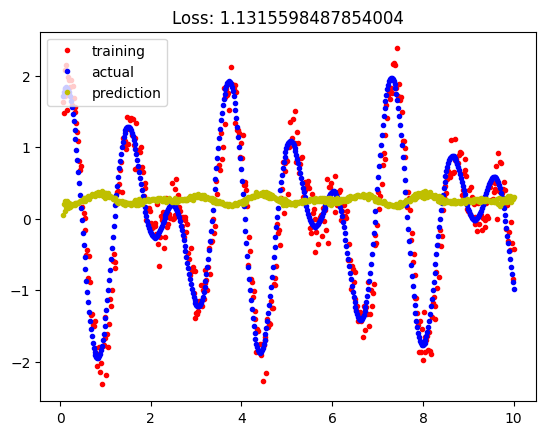

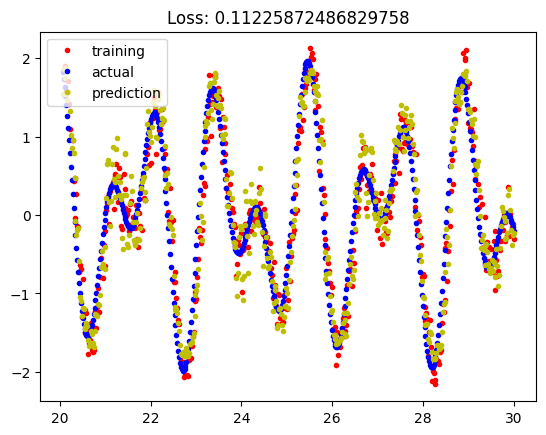

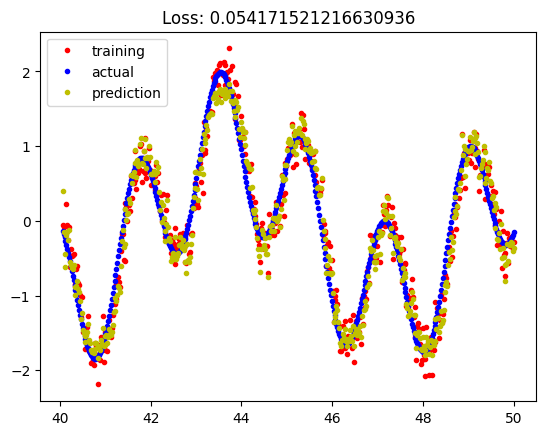

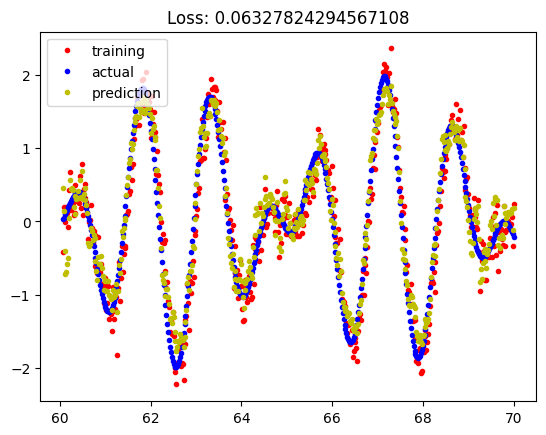

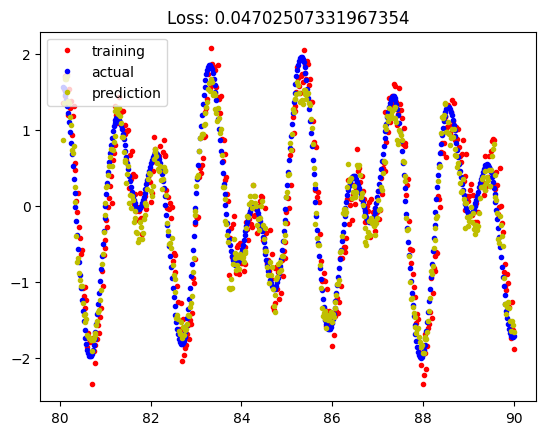

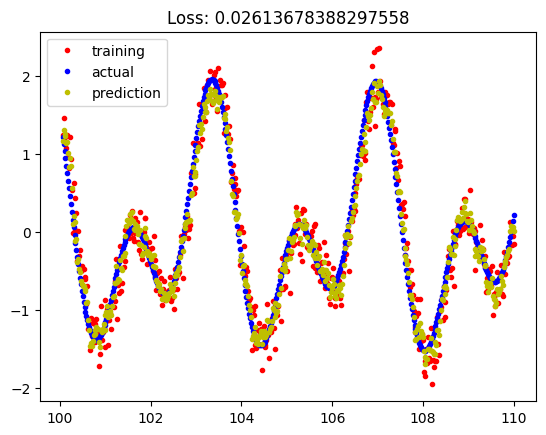

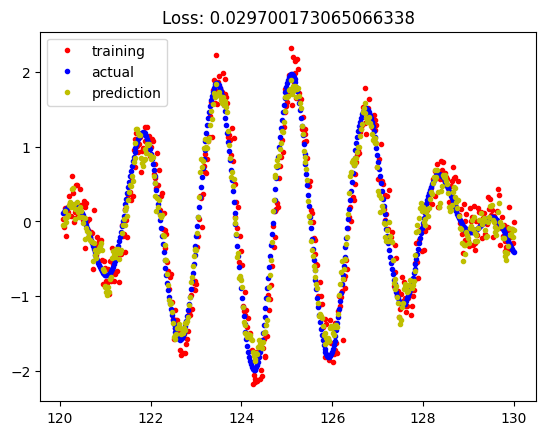

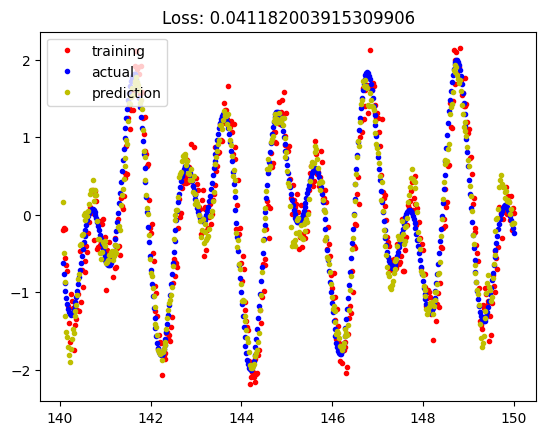

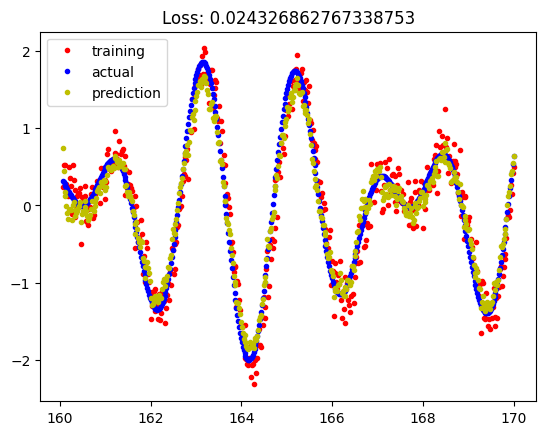

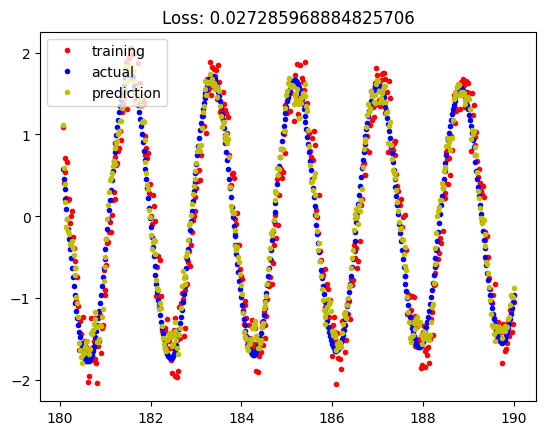

In [39]:

# train the rnn and monitor results

n_steps = 200
stride = 10
lag = 3
alpha = 0.2
seq_length = 500
print_every = 20

trained_rnn = train(rnn, y_func,  n_steps, print_every,
                    stride,seq_length,alpha,lag)

P3Q3: (10pts)

(a) Do you think our model performs well?     
(b) Write about the relationships and interplay between the different hyper-parameters, and explain how they effect the RNN model. Please relate also to the RNN architecture in our solution.

(c) Can you give a real world example where this type of model can be applied?   
(d) What would you change to improve it?

a. Yes, the model performs fine- with each iteration  the loss decreases, the predictions align closely with the actual values, which is an indication that the model works.

b. **n_steps (epochs):** Increasing n_steps generally improves model performance as it allows more learning. However, too many steps can lead to overfitting.

**lag:** This determines how far back in the past the model looks to make predictions. Proper lag helps the model capture relevant patterns. It allows the model to use previous time steps to inform the current prediction.

**alpha (noise level):** Lower alpha makes predictions easier by adding less noise, while higher alpha makes the task more challenging, increasing robustness.

**seq_length:** This is the number of time steps considered in each training sequence. A longer seq_length provides more context, improving accuracy, but requires more computation time.

**stride:** Defines the step size for moving the window. Larger strides result in fewer but more spaced-out predictions, balancing accuracy and speed.

c. This type of model can be used to predict secular patterns, such as spending, temprature, revenues etc.

d. Add more layers to capture more complex patterns. Adjust the learning rate for faster convergence.

/content


In [41]:
!jupyter nbconvert --to html PS2_CNN_RNN_2024_5_ID_208066118.ipynb --output PS2_CNN_RNN_2024_ID_208066118.html

[NbConvertApp] WARNING | pattern 'PS2_CNN_RNN_2024_5_ID_208066118.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes

ANSWER MISSING

THE END!